# The Sparks Foundation- GRIP Internship Jan-Feb 2022

## Data Science & Business Analytics Intern 
---

##### Created By JOVAN MANN

# Task 2: Prediction Using Unsupervised Machine Learning
---

## Background:

This data looks at the information of different species of iris plants with columns consisting of sepal length/width, petal length/width and the species of the plants. 

Predicted attribute: Class of iris plant. 

Attribute information: 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

---

## Relevant Research Papers In Iris Plants:

- Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

- Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.

- Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments". IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.

- Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule". IEEE Transactions on Information Theory, May 1972, 431-433.


## Problem Statement 

***//Predicting the optimum number of clusters using K-Means Clustering from the Iris Datset.\\***

K-Means Clustering: Partition type clustering where datapoints in the dataset will map to K mutually disjoint clusters 

## Methodology

To make a prediction for the number of optimum clusters I will use K-Means Clustering and analyse the different titles for the Iris plants. I will be using Python-Scikit Learn library for machine learning. This package will allow us to implement regression functions. First, I ensured that the data being used was in the correct format and that there no errors or NULL values in the dataset to get the correct output. I completed this using Excel and converted the file into a .csv file.

# 1- Importing/Installing Relevant Libraries and Modules


In [1]:
pip install lux-api # data visualisation module installed

Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests
import pandas as pd
import numpy as np 
import lux
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns
import warnings 

# 2- Loading The Dataset From CSV File

## Dataset:

In [19]:
# obtaining the relevant dataset of the Iris Plants

dataset = "/Users/jovan/Desktop/Iris.csv"

In [20]:
dataset = pd.read_csv(dataset) #get the keys for each column and distinct variables
dataset.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
dataset # the table shows the species of Iris plants and its different features such as the Sepal and Petal Measurements

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
# Printing the first 4 features of the dataset 

x = dataset.iloc[:, [0,1,2,3]].values
print(x)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

In [23]:
dataset.head() # Gives me the first 5 Iris information

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
print(dataset.shape) # columns and rows 

(150, 6)


In [25]:
dataset.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
dataset.isnull().values.any() # There are no NULL values in our dataset

False

In [27]:
dataTypeDict = dict(dataset.dtypes) # gives us what type of data this is.
print(dataTypeDict)

{'Id': dtype('int64'), 'SepalLengthCm': dtype('float64'), 'SepalWidthCm': dtype('float64'), 'PetalLengthCm': dtype('float64'), 'PetalWidthCm': dtype('float64'), 'Species': dtype('O')}


In [28]:
print(dataset.describe()) # descriptive statistics

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# 3- Data Visualisation

Using boxplots to compare the measurements of the iris plants between the different species that have been recorded in the dataset.

#### Boxplots for Comparison of Sepal Length for different Species.

- We find that the the different species of Iris plants vary in Sepal Length. The Iris-sertosa was normally distributed for the Sepal Length with the median being at about 5cm in Sepal Length.

- The Iris-versicolor was slightly positively skewed: mean>median where the data constitutes higher frequency of high value measurements compared to the Iris-Sertosa. For the Iris-versicolor we also find that the 25% of SepalLengthCM fall below 25%. 

- The Iris-virginica was the last specie in our dataset which also showed a slight positive skew in data with the median being 6.5cm indicating that half the measurements are greater than or equal to this value and half are less.

- Results: Iris-virginica compared to the other species had a greater sepal length for majority of its plants. The minimum sepal length for a Iris-virginica was 5.6cm compared to Iris-sertosa and Iris-versicolor at less than 4.5cm and 4.9cm respectively.   

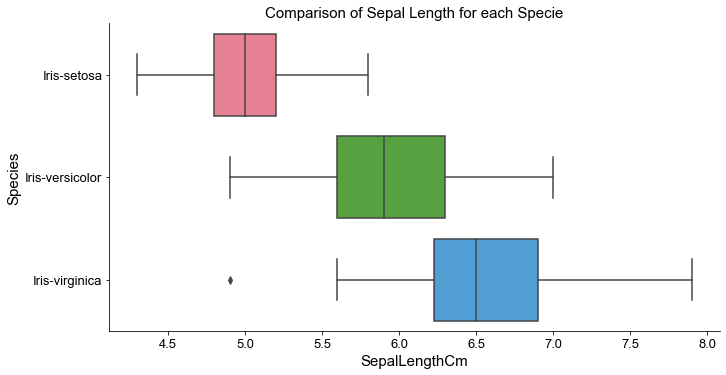

In [32]:
sns.catplot(x = "SepalLengthCm", y = "Species", data = dataset, kind = "box", height = 5, aspect = 2, palette = "husl")
plt.xlabel("SepalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Length for each Specie", size = 15)
sns.set_style("darkgrid")

#### Boxplots for Comparison of Sepal Width for different Species.



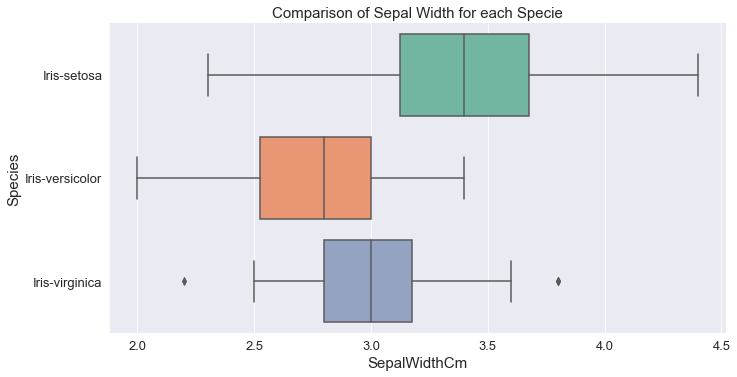

In [33]:
sns.catplot(x = "SepalWidthCm", y = "Species", data = dataset, kind = "box", height = 5, aspect = 2, palette = "Set2")
plt.xlabel("SepalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Width for each Specie", size = 15)
sns.set_style("darkgrid")

#### Boxplots for Comparison of Petal Length for different Species.

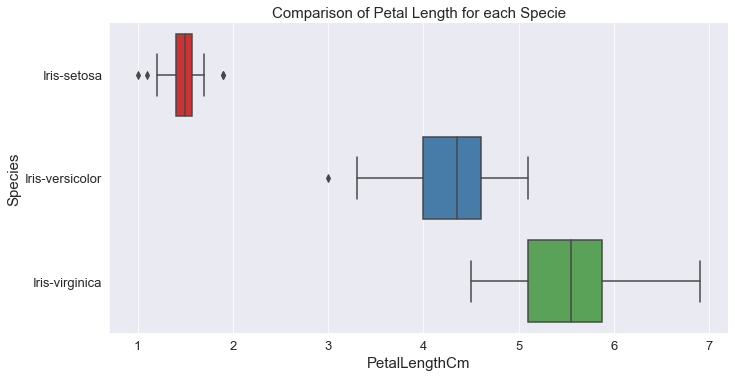

In [34]:
sns.catplot(x = "PetalLengthCm", y = "Species", data = dataset, kind = "box", height = 5, aspect = 2, palette = "Set1")
plt.xlabel("PetalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Length for each Specie", size = 15)
sns.set_style("darkgrid")

#### Boxplots for Comparison of Petal Length for different Species.

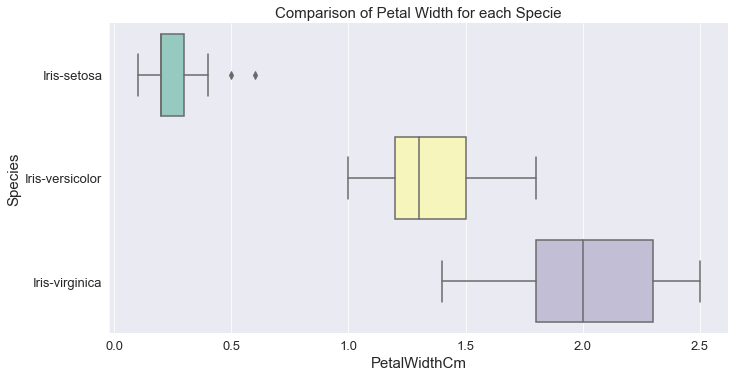

In [36]:
sns.catplot(x = "PetalWidthCm", y = "Species", data = dataset, kind = "box", height = 5, aspect = 2, palette = "Set3")
plt.xlabel("PetalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Width for each Specie", size = 15)
sns.set_style("darkgrid")

# 4- Using The Elbow Method To Find The Optimum Number Of Clusters

he K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. 

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.


In [38]:
cols = dataset.iloc[:,[1,2,3,4]].values
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cols)
    WCSS.append(kmeans.inertia_)

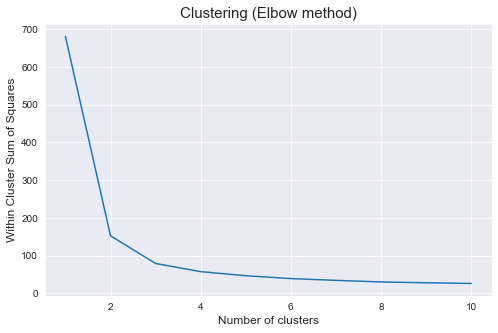

In [39]:
plt.figure(figsize = [8,5])
plt.plot(range(1,11), WCSS)
plt.xlabel('Number of clusters', size = 12)
plt.ylabel('Within Cluster Sum of Squares', size = 12)
plt.title('Clustering (Elbow method)', size = 15)
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cols)

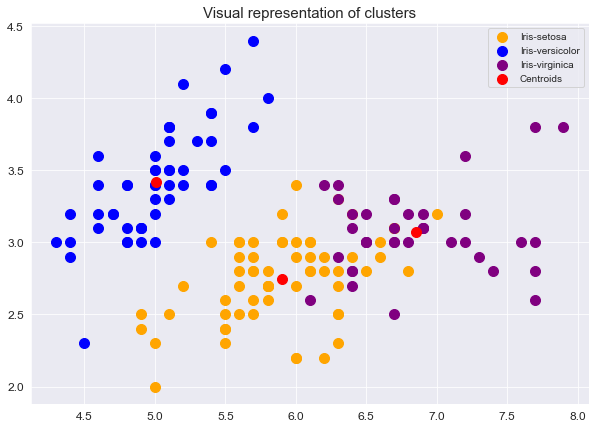

In [41]:
plt.figure(figsize = (10,7))
plt.scatter(cols[y_kmeans == 0, 0], cols[y_kmeans == 0,1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(cols[y_kmeans == 1, 0], cols[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(cols[y_kmeans == 2, 0], cols[y_kmeans == 2,1], s = 100, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Visual representation of clusters', size = 15)
plt.show()

# 5- Results 

There are many other ways to find the optimal number of clusters such as the silhouette analysis measuring the dispersion of a datapoint within a cluster compared to other clusters. There are also others way to record findings for a K-Means clustering. From the visual representation of the clusters we can see that the centroids determine the optimal number of clusters.